**OBJECTIVE:** Replicate two illustrative scenarios we have in the paper of under- and over-reporters 

**LAST UPDATED:** 27/12/2021



In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import re

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import vimure as vm

from sklearn.metrics import f1_score

from plotnine import * 
from mizani.formatters import percent_format

In [12]:
# https://stackoverflow.com/a/59812588/843365
!export PYTHONUNBUFFERED=1

# Context 





We want to simulate two extreme scenarios to illustrate the capabilities of our model:

**Under-reporters**


A scenario in which there are two types of reporters: 
- $m_{\text{regular}}$, those who accurately report ties $\theta^l_{m_{\text{regular}}} = 1.0$
- $m_{\text{under}}$, those who consistently under-report ties $\theta^l_{m_{\text{under}}} = 0.5$

**Over-reporters**


A scenario in which there are two types of reporters: 
- $m_{\text{regular}}$, those who accurately report ties $\theta^l_{m_{\text{regular}}} = 1.0$
- $m_{\text{over}}$, those who consistently under-report ties $\theta^l_{m_{\text{over}}} = 50$

# Setup

In [13]:
# Parameters related to the ground truth network. 
# Re-run with different seed or parameters to get a different Y
gt_params = {
    "N" : 100,
    "M" : 100, 
    "L" : 1,
    "C" : 2, 
    "K" : 2, 
    "avg_degree" : 10,
    "sparsify" : True,
    "gt_network_seed" : 2}


# Percentage of reporters who exaggerate (either under- or over- reporting)
THETA_RATIO_VALS = [
    0.01,
    0.02,
    0.03,
    0.05,
    0.08,
    0.10,
    0.15,
    0.20,
    0.30,
    0.40,
    0.50,
]

seeds = np.arange(10)

This simulation is setup on the script experiments/unreliable_reporters.py.

The expriment class replicates a scikit-learn structure to represent an experiment. By extending from sklearn, we can make better use of Grid Search and the library's metrics such as f1-score, mean absolute error, etc.


In [14]:

import experiments.unreliable_reporters as experiment

# Experiment with no mutuality $\eta = 0$

In [15]:
# Set verbose=True if you like to see log of what is going on. Warning: This prints A LOT of logs 

grid_over, results_df_000 =\
    experiment.main(eta=0.0,
                    theta_ratio_vals = THETA_RATIO_VALS,
                    available_seeds = seeds, # This ensures we have 10 rounds of inference for every parameter combination
                    exaggeration_type = ["over", "under"],
    
                    num_realisations=5,
                    max_iter=10,
                    n_jobs=8, # Number of CPU processors to use, set it to -1 to let it choose automatically
                    save_output=False,
                    verbose=False,
                    **gt_params)

2023-02-23 14:14:12,360 - [PID 2429] - experiments.unreliable    - INFO - Creating ground truth network with eta=0.00...
2023-02-23 14:14:12,395 - [PID 2429] - experiments.unreliable    - INFO - Multitensor took 0.03 seconds to run'


Fitting 1 folds for each of 440 candidates, totalling 440 fits


2023-02-23 14:17:02,993 - [PID 2429] - experiment.UnreliableReportersExp - INFO - Building custom_theta with parameters: theta_ratio=0.01 & exaggeration_type=over
2023-02-23 14:17:02,995 - [PID 2429] - experiment.UnreliableReportersExp - INFO - Generating X with same eta as ground truth: eta=0.00
2023-02-23 14:17:03,710 - [PID 2429] - experiment.UnreliableReportersExp - INFO - Running ViMuRe model WITH mutuality...
2023-02-23 14:17:04,610 - [PID 2429] - experiment.UnreliableReportersExp - INFO - ViMuRe model took 0.9 seconds to run'
2023-02-23 14:17:04,611 - [PID 2429] - experiments.unreliable    - INFO - Grid search is complete after 2.87 minutes


In [16]:
results_df_000.head()

,param_exaggeration_type,param_mutuality,param_seed,param_theta_ratio,mean_test_f1,mean_test_mse,std_test_f1,std_test_mse,mean_fit_time,eta
0,over,True,0,0.01,1.0,0.0,0.0,0.0,2.682793,0.0
1,over,True,0,0.02,1.0,0.0,0.0,0.0,2.641292,0.0
2,over,True,0,0.03,1.0,0.0,0.0,0.0,2.551025,0.0
3,over,True,0,0.05,1.0,0.0,0.0,0.0,2.632993,0.0
4,over,True,0,0.08,1.0,0.0,0.0,0.0,2.880783,0.0


To replicate any specific result, refer back to **Notebook 02** to generate a synthetic network (Y, X) and run the model with the desired seed.

# Experiment with some mutuality $\eta=0.2$


The cell below perform tests with under and over-reporting

In [17]:
# Set verbose=True if you like to see log of what is going on. Warning: This prints A LOT of logs 

grid, results_df_020 =\
    experiment.main(eta=0.2,
                    theta_ratio_vals = THETA_RATIO_VALS,
                    available_seeds = seeds, # This ensures we have 10 rounds of inference for every parameter combination
                    exaggeration_type = ["under", "over"],
                                              

                    num_realisations=5,
                    max_iter=10,
                    n_jobs=8, # Number of CPU processors to use, set it to -1 to let it choose automatically
                    save_output=False,
                    verbose=False,
                    **gt_params)

2023-02-23 14:17:04,711 - [PID 2429] - experiments.unreliable    - INFO - Creating ground truth network with eta=0.20...
2023-02-23 14:17:04,745 - [PID 2429] - experiments.unreliable    - INFO - Multitensor took 0.03 seconds to run'


Fitting 1 folds for each of 440 candidates, totalling 440 fits


2023-02-23 14:20:11,437 - [PID 2429] - experiment.UnreliableReportersExp - INFO - Building custom_theta with parameters: theta_ratio=0.01 & exaggeration_type=over
2023-02-23 14:20:11,440 - [PID 2429] - experiment.UnreliableReportersExp - INFO - Generating X with same eta as ground truth: eta=0.20
2023-02-23 14:20:12,468 - [PID 2429] - experiment.UnreliableReportersExp - INFO - Running ViMuRe model WITH mutuality...
2023-02-23 14:20:13,730 - [PID 2429] - experiment.UnreliableReportersExp - INFO - ViMuRe model took 1.26 seconds to run'
2023-02-23 14:20:13,732 - [PID 2429] - experiments.unreliable    - INFO - Grid search is complete after 3.15 minutes


Retrieve the best performing model:

# Experiment with more mutuality $\eta=0.6$


The cell below already perform tests with under and over-reporting

In [18]:
# Set verbose=True if you like to see log of what is going on. Warning: This prints A LOT of logs 

grid, results_df_060 =\
    experiment.main(eta=0.6,
                    theta_ratio_vals = THETA_RATIO_VALS,
                    available_seeds = seeds, # This ensures we have 10 rounds of inference for every parameter combination
                    exaggeration_type = ["under"],
                                              
                    num_realisations=5,
                    max_iter=10,
                    n_jobs=8, # Number of CPU processors to use, set it to -1 to let it choose automatically
                    save_output=False,
                    verbose=False,
                    **gt_params)

2023-02-23 14:20:13,791 - [PID 2429] - experiments.unreliable    - INFO - Creating ground truth network with eta=0.60...
2023-02-23 14:20:13,831 - [PID 2429] - experiments.unreliable    - INFO - Multitensor took 0.04 seconds to run'


Fitting 1 folds for each of 220 candidates, totalling 220 fits


2023-02-23 14:21:40,209 - [PID 2429] - experiment.UnreliableReportersExp - INFO - Building custom_theta with parameters: theta_ratio=0.01 & exaggeration_type=under
2023-02-23 14:21:40,210 - [PID 2429] - experiment.UnreliableReportersExp - INFO - Generating X with same eta as ground truth: eta=0.60
2023-02-23 14:21:40,881 - [PID 2429] - experiment.UnreliableReportersExp - INFO - Running ViMuRe model WITH mutuality...
2023-02-23 14:21:41,722 - [PID 2429] - experiment.UnreliableReportersExp - INFO - ViMuRe model took 0.84 seconds to run'
2023-02-23 14:21:41,723 - [PID 2429] - experiments.unreliable    - INFO - Grid search is complete after 1.46 minutes


# All together

Combine the CSVs generated above to produce a single result/plot

In [19]:
def plot_F1_scores(results_df, metric="f1"):
    cols_rename = {col: re.sub("param\_", "", col) for col in results_df.columns.tolist() if col.startswith("param_")}
    cols_rename.update({"param_mutuality": "model"})
    cols_rename.update({"param_exaggeration_type": "exa"})

    group_cols = ["eta", "exa", "theta_ratio", "model"]

    plot_df = results_df.rename(columns=cols_rename).groupby(group_cols)
    plot_df = plot_df.apply(lambda x: pd.Series({"mean_test_score": x[f"mean_test_{metric}"].mean(),"std_test_score": x[f"mean_test_{metric}"].std()}))

    plot_df = plot_df.reset_index()
    plot_df["ymax"] = plot_df['mean_test_score'] + plot_df['std_test_score']
    plot_df["ymin"] = plot_df['mean_test_score'] - plot_df['std_test_score']
    cols = plot_df.columns

    plot_df["model"] = plot_df["model"].apply(lambda x: r"$ViMuRe_{T}$" if x else r"$ViMuRe_{F}$")


    g = (ggplot(plot_df.reset_index(), 
            aes(x='theta_ratio', 
                y='mean_test_score',
                ymax='ymax',
                ymin='ymin',
                group='theta_ratio',
                color='model',
                fill='model',
                shape='model')) + 
    #  geom_errorbar(width=None) + 
     geom_point(size=3, alpha=0.7) + 
    #  annotate(geom="text", x=0.01, y=0.1, label=r"$\eta = $ %.2f" % results_df["eta"][0]) + 
     scale_x_continuous(name=r"$\theta_{ratio}$", 
                        breaks=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],  
                        labels=percent_format(), 
                        limits=(min(THETA_RATIO_VALS), max(THETA_RATIO_VALS))) +
     scale_fill_discrete(name=" ") +
     scale_shape_discrete(name=" ") +
     scale_color_discrete(name=" ") +
     scale_y_continuous(name="F1-score", limits=(0, 1)) +
     theme_bw() +
     theme(figure_size=(6, 3), axis_text_x=element_text(size=7)) +
     facet_grid("exa ~ eta", labeller="label_both") +
     ggtitle("F1 scores for a fixed ground truth and 10 realisations of the X network + inference model")
    )

    return g

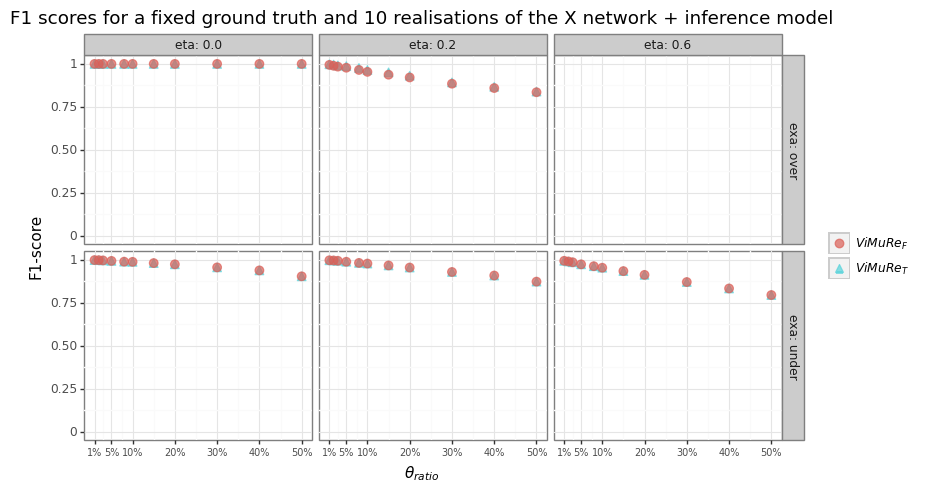

<ggplot: (8774063887733)>

In [20]:
results_df = pd.concat([results_df_000, results_df_020, results_df_060])

results_df["eta"] = results_df["eta"].astype(float)

g = plot_F1_scores(results_df) + theme(figure_size=(9, 5))
# ggsave(g, filename="/mnt/data/exp_unreliable_reporters_f1_scores.png")

g